In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Data had to be cleaned slightly prior to use. The file was a series of json objects. To make the data one comprehensible json object, this command was run:

`./data/clean_data.sh data/taxi-2009-2016-monthly-summary.json`

And then a [ was placed at the start of the file and ] was placed at the end. The last comma was removed for validation (}, was changed to }).

In [2]:
trips = pd.read_json('data/taxi-2009-2016-monthly-summary.json')
trips.head()

,cnt,cohort,mean_time,percentiles,stddev_pop,stddev_samp
0,15749228,2013-03,719.445285,"[240.0, 310.0, 420.0, 480.0, 600.0, 712.0, 840...",1304.068416,1304.068458
1,15100468,2013-04,747.583700,"[240.0, 327.0, 420.0, 508.0, 600.0, 720.0, 875...",804.104881,804.104908
2,15285049,2013-05,783.730923,"[240.0, 343.0, 420.0, 540.0, 631.0, 758.0, 900...",2270.820836,2270.820911
3,14385456,2013-06,782.014114,"[240.0, 346.0, 420.0, 540.0, 636.0, 763.0, 900...",4132.919623,4132.919767
4,1541557,2016-12,947.889267,"[226.0, 323.0, 415.0, 514.0, 625.0, 756.0, 923...",3625.984479,3625.985655


In [14]:
cleaned = trips.dropna(subset=['mean_time'])

## Visualization



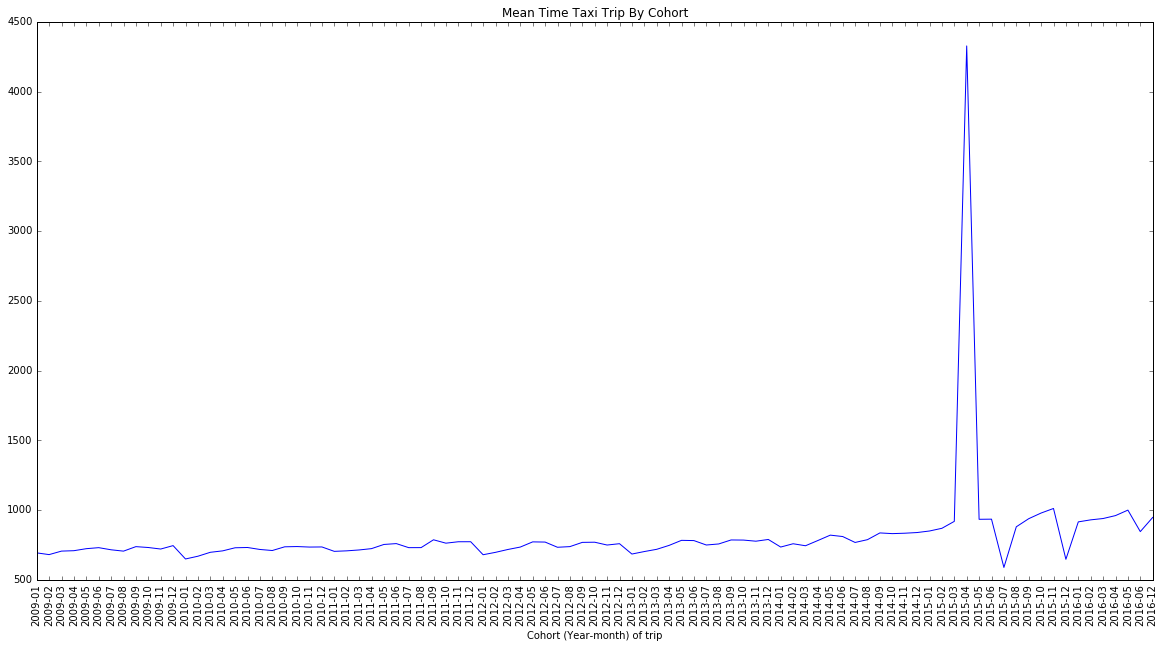

In [12]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)

ordered_data = cleaned.sort_values(['cohort'])
x_pos = np.arange(len(ordered_data['cohort']))
plt.plot(x_pos, ordered_data['mean_time'])
plt.xticks(x_pos, ordered_data['cohort'], rotation='vertical')
plt.xlabel('Cohort (Year-month) of trip')
plt.title('Mean Time Taxi Trip By Cohort')

plt.show()

These values should be excluded and further analyzed in the source:

- 2015-04
- 2015-07
- 2015-12

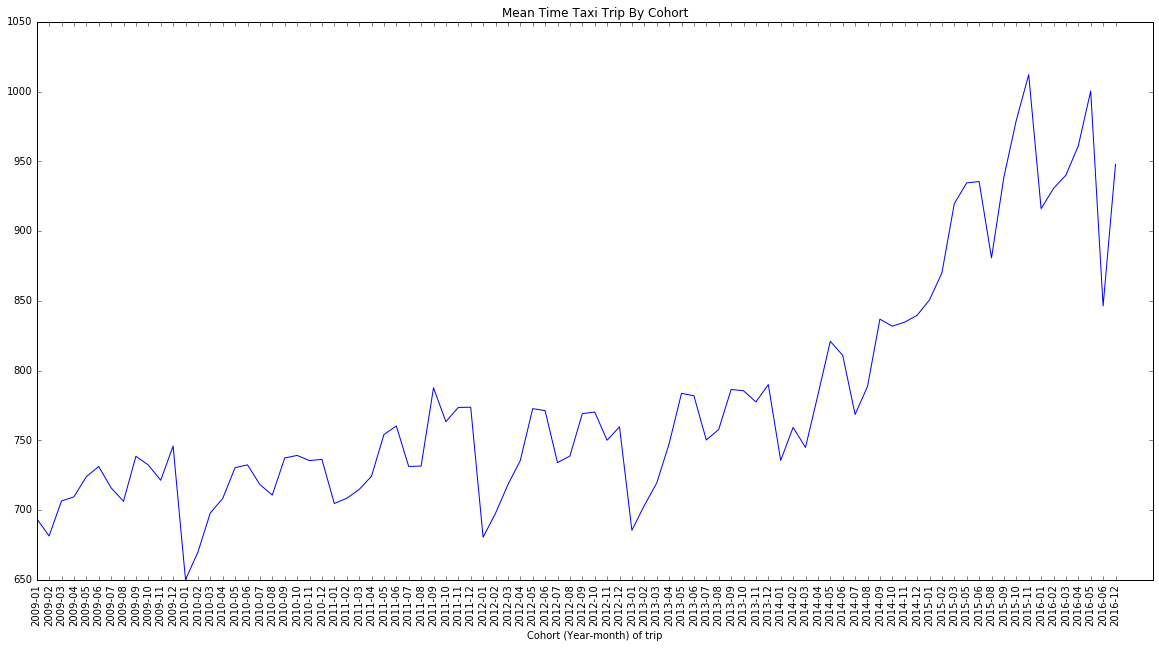

In [26]:
extreme_removed = cleaned.mask(cleaned["cohort"].isin(["2015-04", "2015-07", "2015-12"])).dropna(subset=['mean_time'])

ordered_data = extreme_removed.sort_values(['cohort'])
x_pos = np.arange(len(ordered_data['cohort']))
plt.plot(x_pos, ordered_data['mean_time'])
plt.xticks(x_pos, ordered_data['cohort'], rotation='vertical')
plt.xlabel('Cohort (Year-month) of trip')
plt.title('Mean Time Taxi Trip By Cohort')

plt.show()